### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_profiling import ProfileReport

### Import data

In [2]:
credit = pd.read_csv('credit-card-data.csv')

In [3]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
credit.drop('CUST_ID',axis=1,inplace=True)

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

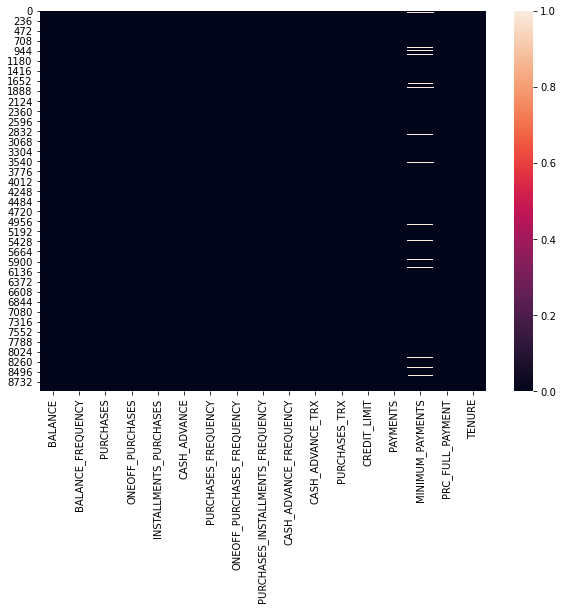

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(credit.isna())

In [8]:
credit.loc[(credit['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = credit['MINIMUM_PAYMENTS'].mean()
credit.loc[(credit['CREDIT_LIMIT'].isnull()== True),'CREDIT_LIMIT'] = credit['CREDIT_LIMIT'].mean()

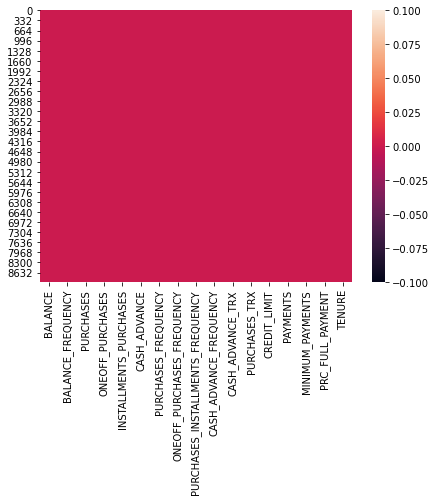

In [9]:
plt.figure(figsize=(7,5))
sns.heatmap(credit.isna())

In [10]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Summary of the Dataset:
- There are 8950 register with 18 feature.
- The data is in numerical form, except for the customer id(CUST_ID) which is an object containing letters and numbers.
- On average, clients maintain 1564 dollar in the bank account for use with the  debit card
- On average, clients spend 1000 USD on purchases.
- About the purchase mode, on average clients spend 592 dollars on one-off purchases and 411 dollars on purchases with installments.
- Good news for the bank: clients, on average, use 978 dollars as cash advancement. One must have in mind that, in general, the taxes for cash advancement are higher than the credit card taxes.
- In regards to frequency, clients more frequently make purchases with installents (mean = 0.364) than one-off (mean = 0.202).
- Regarding credit limits on the credit card, the maximum limit is 30,000 dollars with the minimum being 50 dollars. On average, clients have a credit card limit of 4494 dollars.

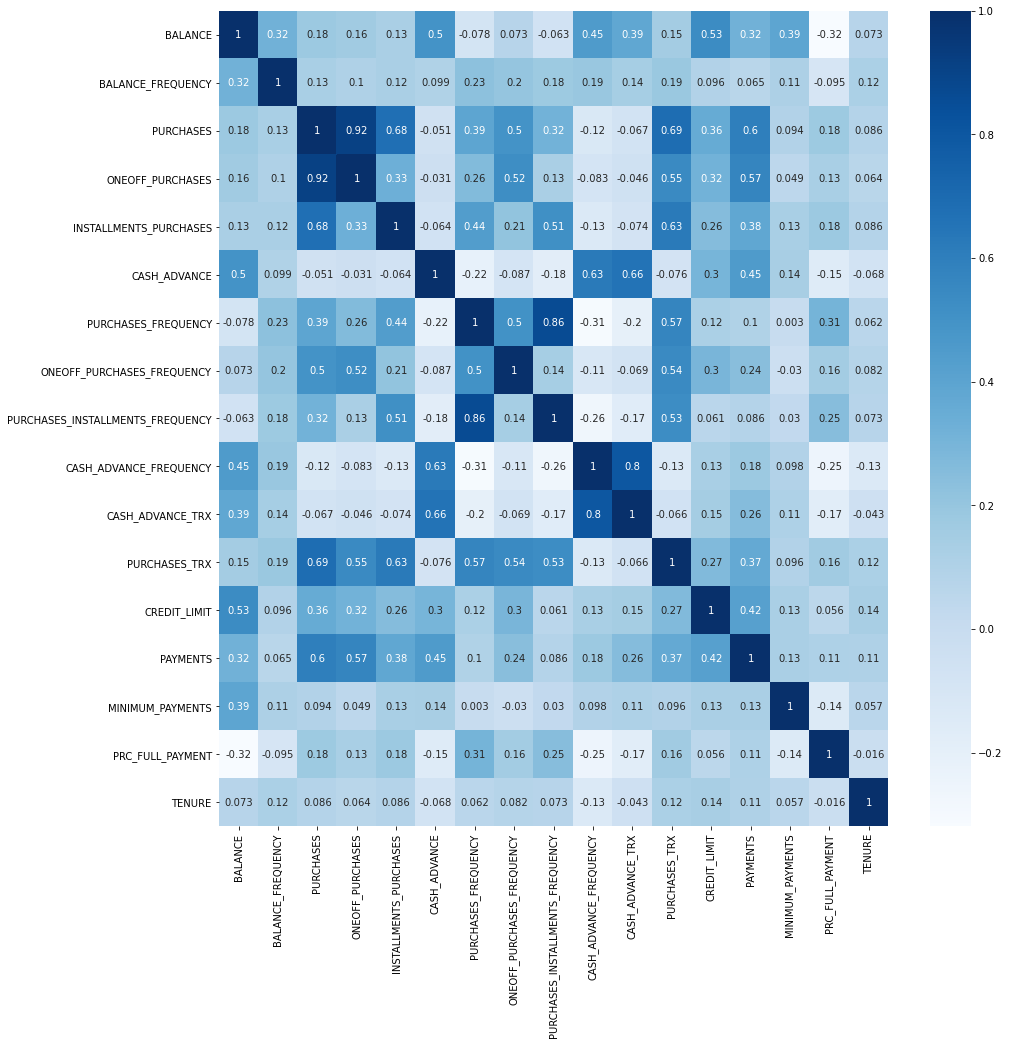

In [11]:
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(credit.corr(),annot=True, cmap='Blues',ax=ax)

Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit. Payments variable has a high correletion with Purchases and one off Purchases. Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables.

In [12]:
profile = ProfileReport(credit, title="Pandas Profiling Report")

In [13]:
profile.to_notebook_iframe()

In [14]:
profile.to_file("Credit_card_report.html")

## KPIs

### Monthly Average Purchase

In [15]:
credit['MONTHLY_AVG_PUR'] = credit['PURCHASES']/credit['TENURE']
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PUR
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,124.916667
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333


### Cash Advance Amont

In [16]:
credit['MONTLY_CASH_ADVANCE'] = credit['CASH_ADVANCE']/credit['TENURE']
credit.head()
credit['MONTLY_CASH_ADVANCE'].describe()

count    8950.000000
mean       88.977984
std       193.136115
min         0.000000
25%         0.000000
50%         0.000000
75%        99.085196
max      3928.100980
Name: MONTLY_CASH_ADVANCE, dtype: float64

In [17]:
def purchase(x):
    if (x['ONEOFF_PURCHASES']==0) & (x['INSTALLMENTS_PURCHASES']==0):
        return 'NONE'
    if (x['ONEOFF_PURCHASES']>0) & (x['INSTALLMENTS_PURCHASES']>0):
         return 'BOTH'
    if (x['ONEOFF_PURCHASES']>0) & (x['INSTALLMENTS_PURCHASES']==0):
        return 'ONE_OFF'
    if (x['ONEOFF_PURCHASES']==0) & (x['INSTALLMENTS_PURCHASES']>0):
        return 'INSTALLMENT'

In [18]:
credit['PURCHASE_TYPE'] = credit.apply(purchase,axis=1)
credit['PURCHASE_TYPE'].value_counts()

BOTH           2774
INSTALLMENT    2260
NONE           2042
ONE_OFF        1874
Name: PURCHASE_TYPE, dtype: int64

### Limit Usage (balance to credit limit ratio)

In [19]:
credit['LIMIT_USAGE'] = credit['BALANCE']/credit['CREDIT_LIMIT']

In [20]:
credit['LIMIT_USAGE'].describe()

count    8950.000000
mean        0.388883
std         0.389722
min         0.000000
25%         0.041494
50%         0.302720
75%         0.717571
max        15.909951
Name: LIMIT_USAGE, dtype: float64

### Payment to minimum payment ratio

In [23]:
credit['MINIMUM_PAY'] = credit['PAYMENTS']/credit['MINIMUM_PAYMENTS']
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PUR,MONTLY_CASH_ADVANCE,PURCHASE_TYPE,LIMIT_USAGE,MINIMUM_PAY
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,INSTALLMENT,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,NONE,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,ONE_OFF,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,ONE_OFF,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,ONE_OFF,0.681429,2.771075


## Gaining Insight from the data

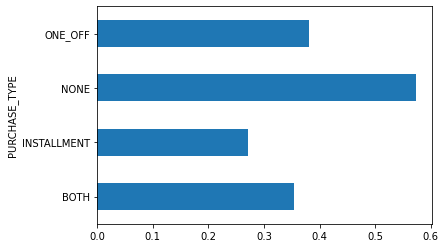

In [24]:
credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['LIMIT_USAGE'])).plot.barh()

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

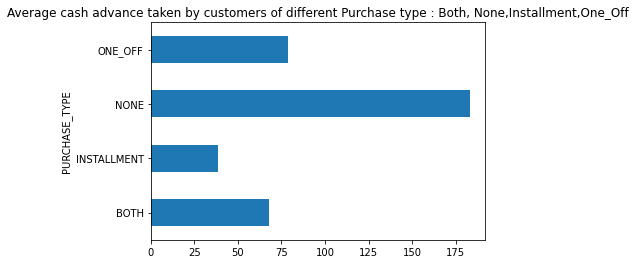

In [25]:
credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTLY_CASH_ADVANCE'])).plot.barh()
plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

In [26]:
x = credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MINIMUM_PAY']))

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

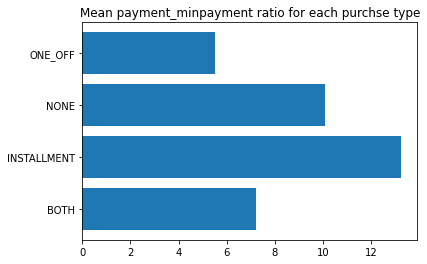

In [27]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

## CLUSTERING

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [29]:
credit_o =credit.drop('PURCHASE_TYPE',axis=1)

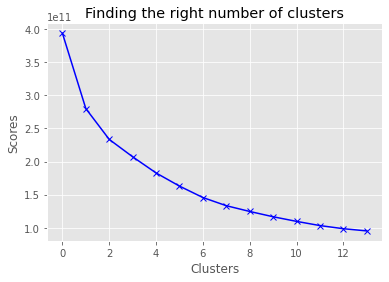

In [41]:
wcss = []

range_values = range(1,15)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(credit_o)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

Here number of clusters = 5

In [33]:
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=30,random_state=101)
kmeans.fit(credit_o)

KMeans(n_clusters=5, n_init=30, random_state=101)

In [34]:
credit['labels'] = kmeans.labels_
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PUR,MONTLY_CASH_ADVANCE,PURCHASE_TYPE,LIMIT_USAGE,MINIMUM_PAY,labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,INSTALLMENT,0.040901,1.446508,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,NONE,0.457495,3.826241,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,ONE_OFF,0.332687,0.991682,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,864.206542,0.000000,12,124.916667,17.149001,ONE_OFF,0.222223,0.000000,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,ONE_OFF,0.681429,2.771075,2


In [35]:
pca = PCA(n_components=2)
comp = pca.fit_transform(credit_o)
comp

array([[-4327.48999806,   922.34624707],
       [ 4123.2468827 , -2469.56699924],
       [ 1493.63003759, -1984.65367249],
       ...,
       [-4380.13695677,   913.45023017],
       [-4791.97756812,  1032.26982426],
       [-3620.16414603,  1564.04608024]])

In [36]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=comp,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
5804,3766.300165,2717.487344
3085,-2223.689817,-351.561275
1792,-1397.302195,-457.363052
412,-4159.455630,673.702542
7750,-4592.167333,891.694819


In [37]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,credit['labels']], axis = 1)
pca_df.head()

,pca1,pca2,labels
0,-4327.489998,922.346247,2
1,4123.246883,-2469.566999,3
2,1493.630038,-1984.653672,3
3,1392.342379,-1470.956247,3
4,-3744.929303,755.986016,2


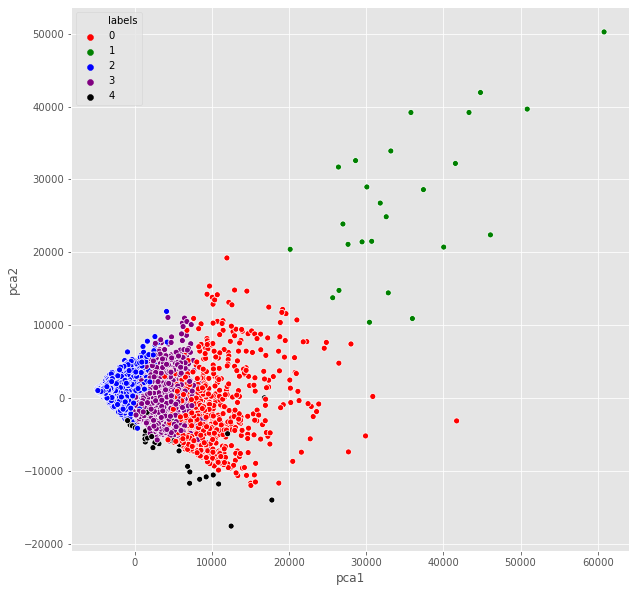

In [38]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "labels", data = pca_df, palette =['red','green','blue','purple', 'black'])
plt.show()

Here the clusters can visualized quite distinctively

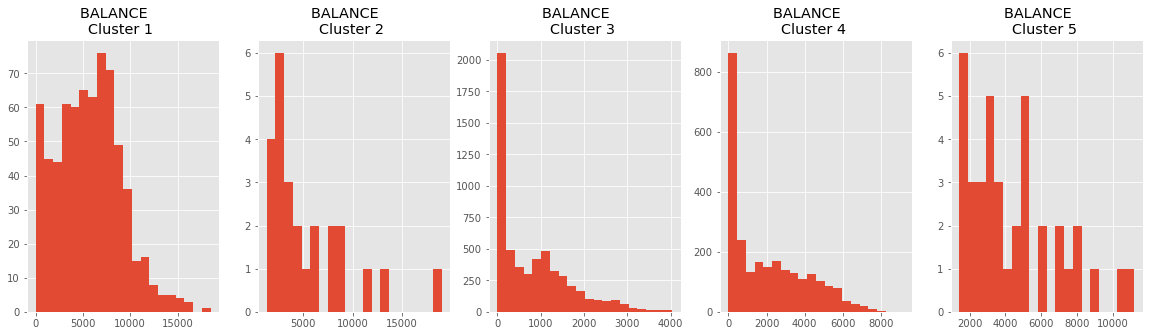

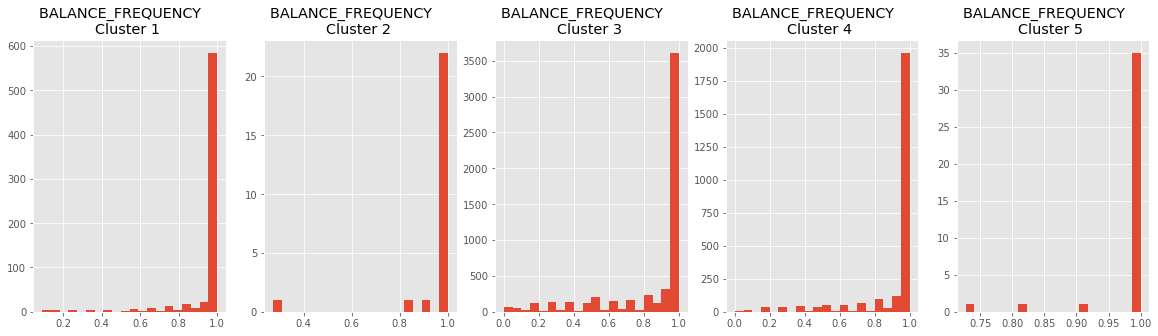

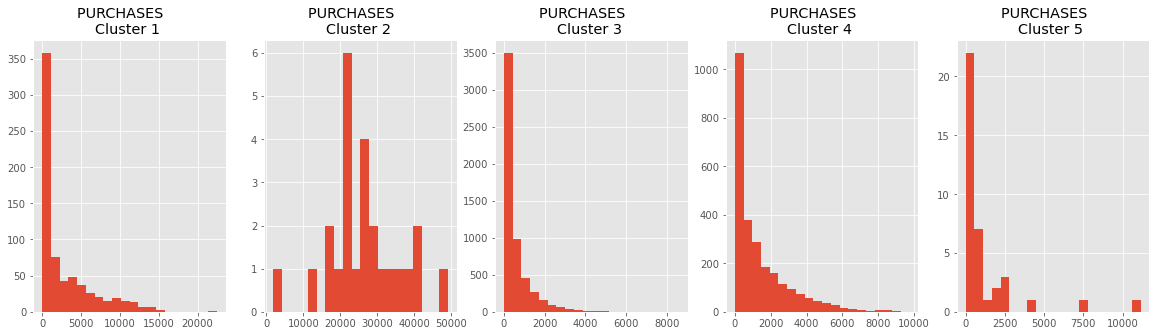

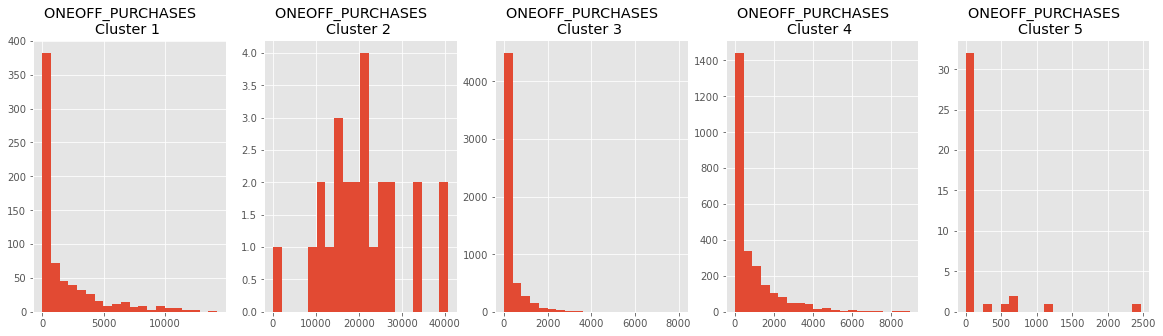

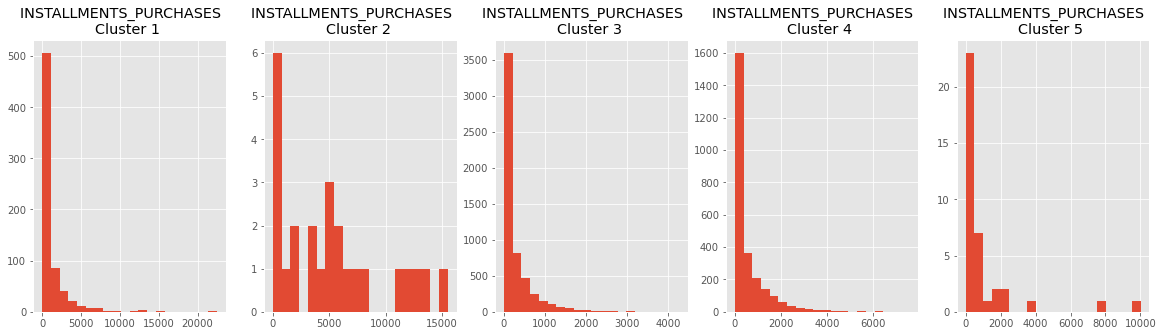

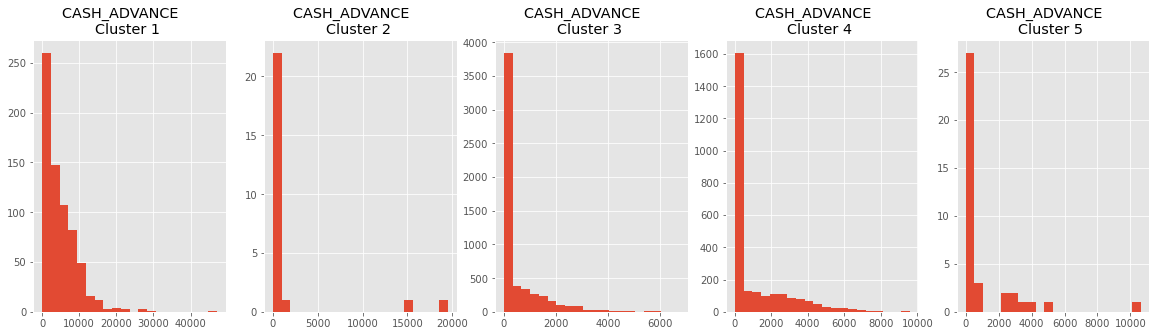

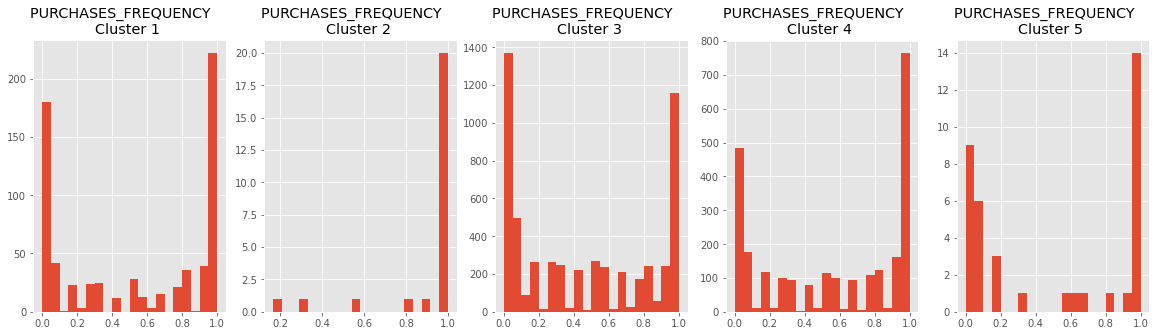

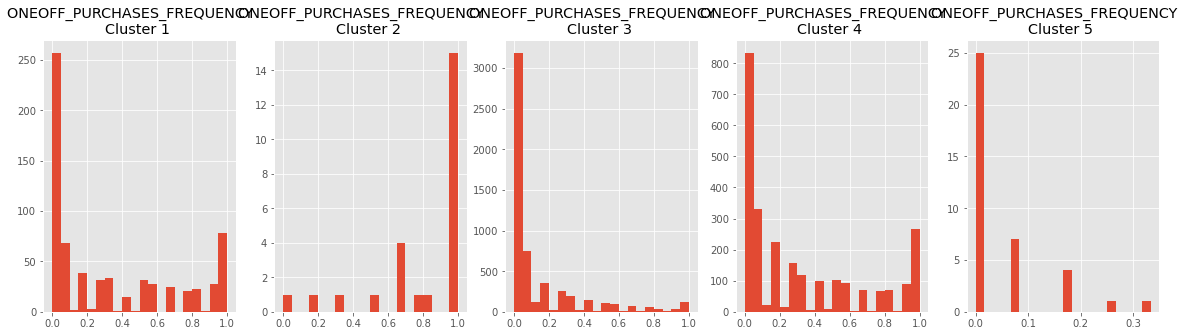

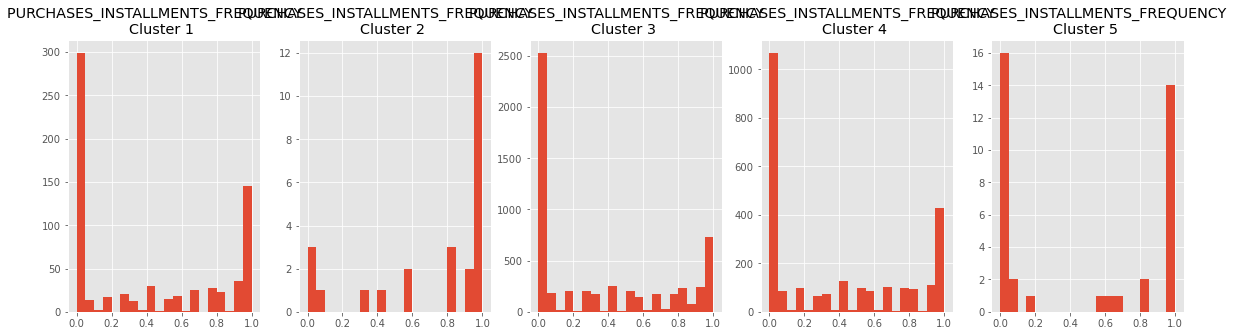

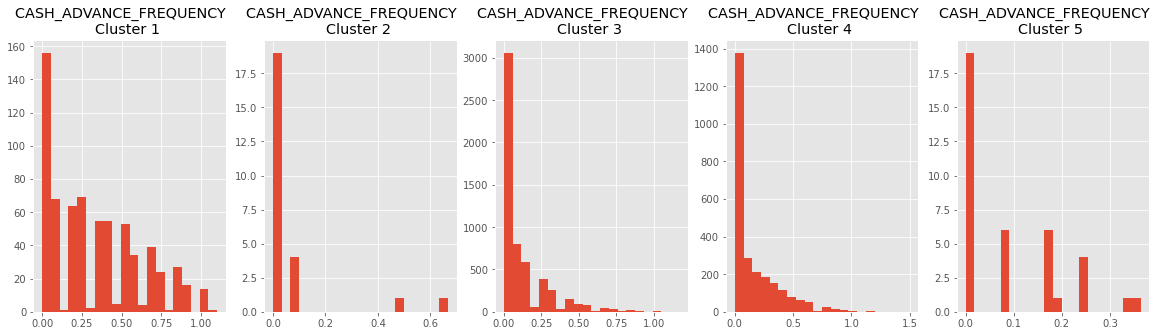

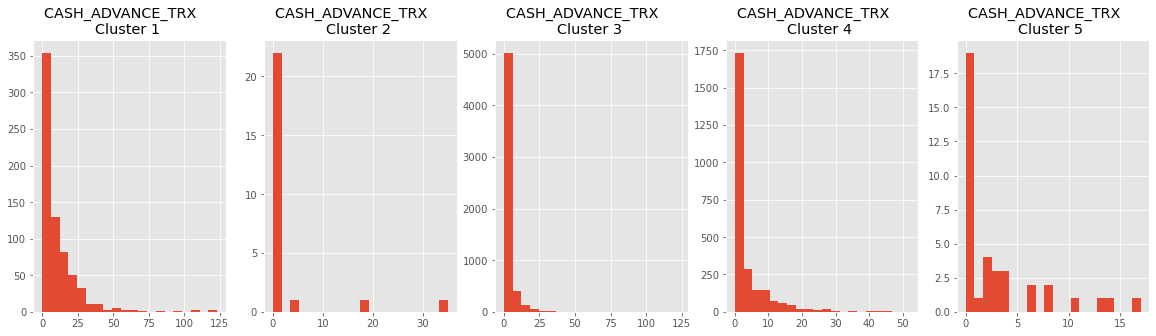

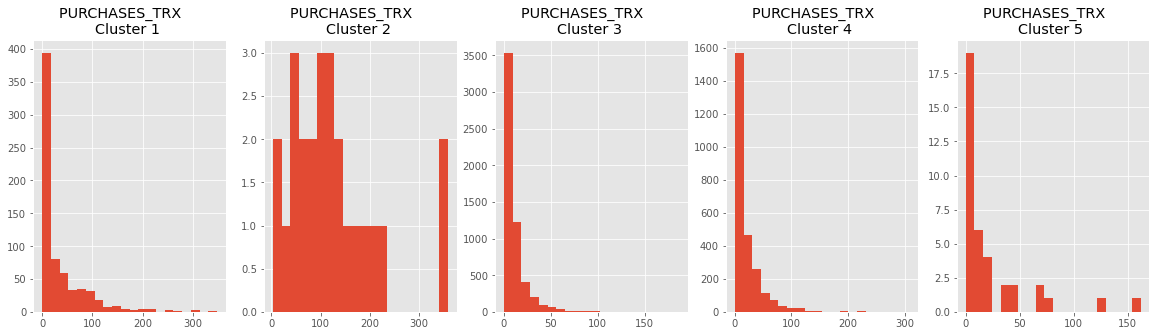

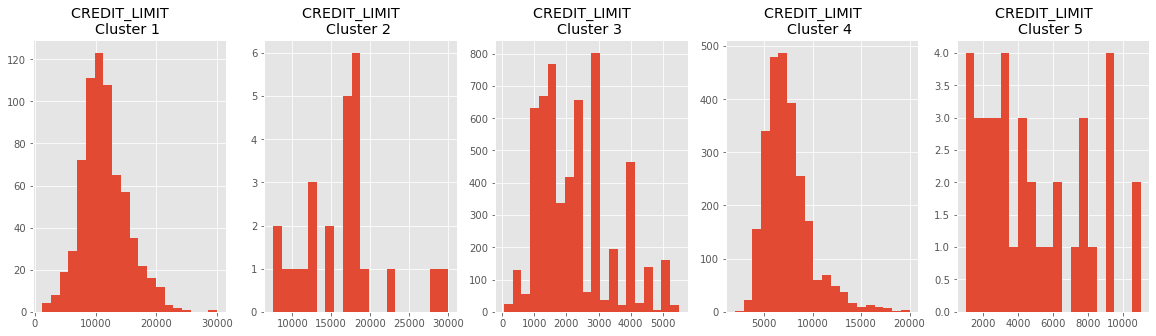

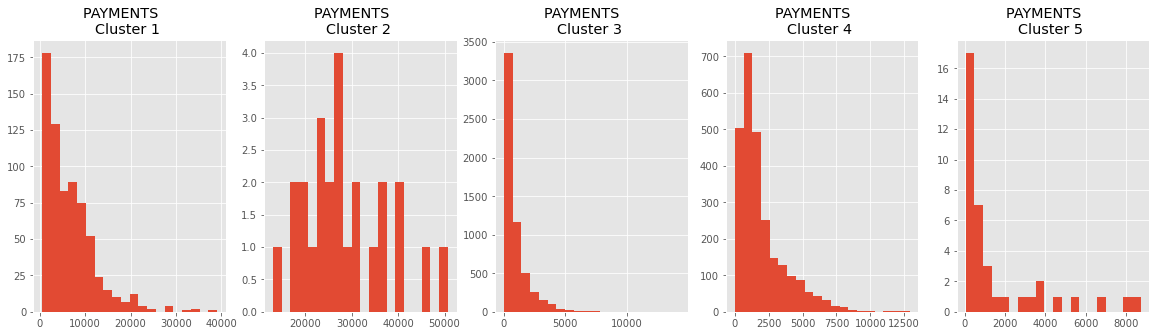

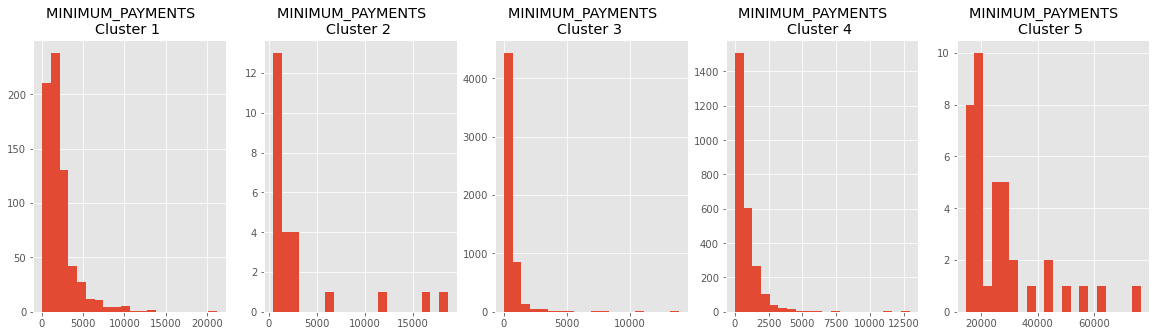

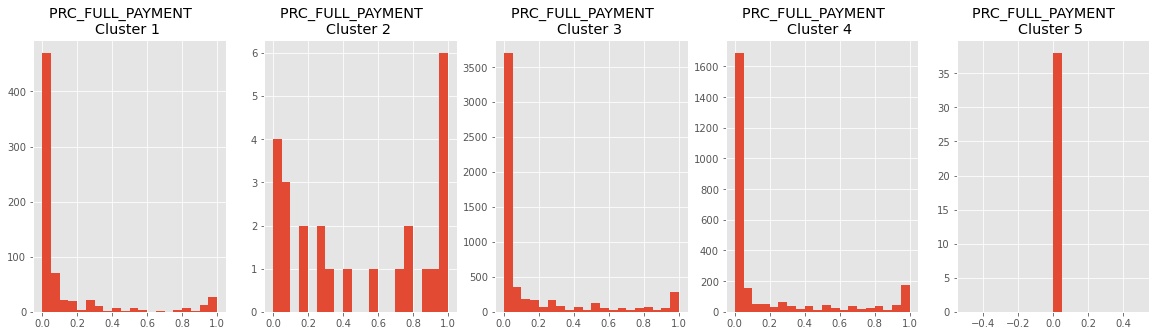

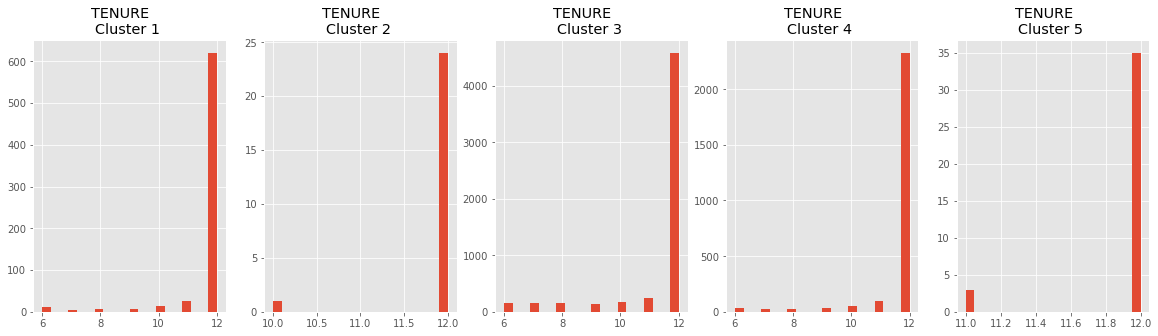

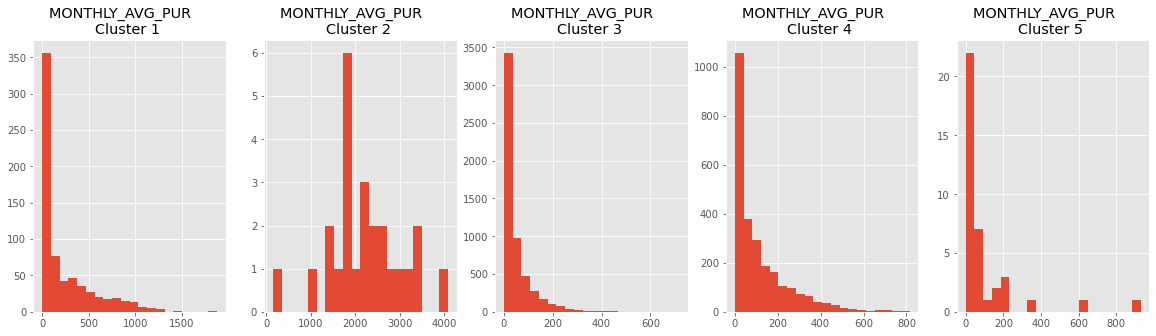

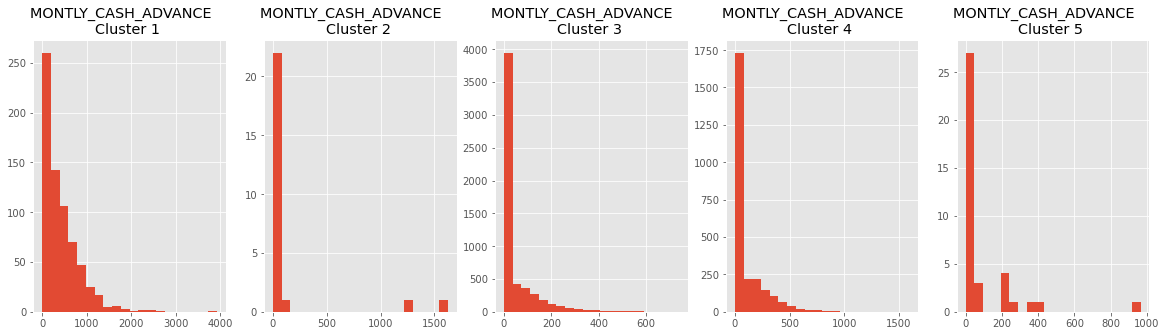

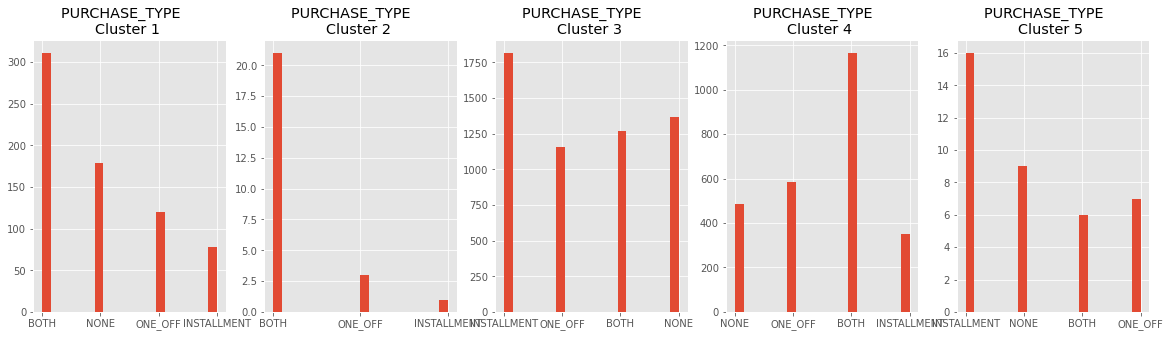

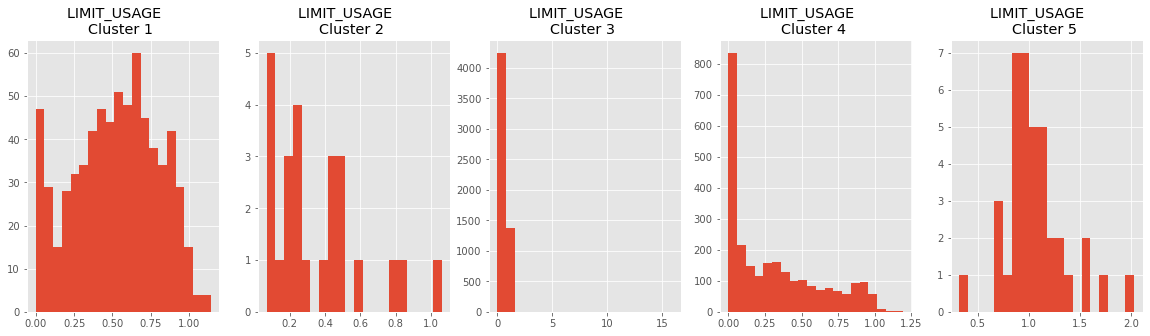

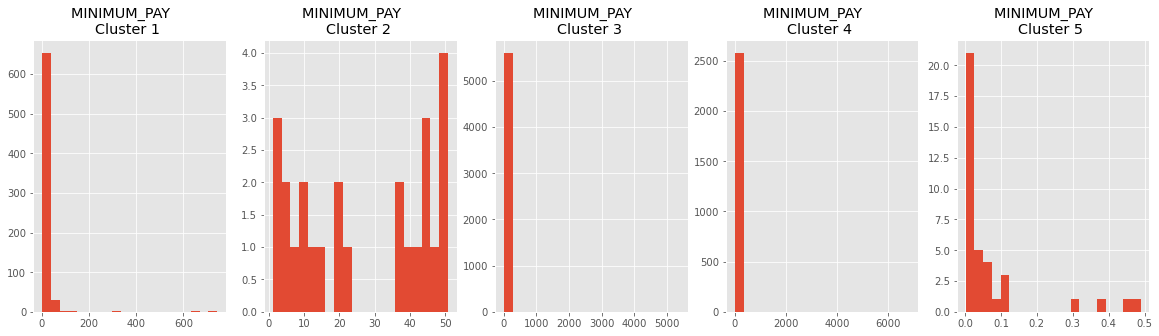

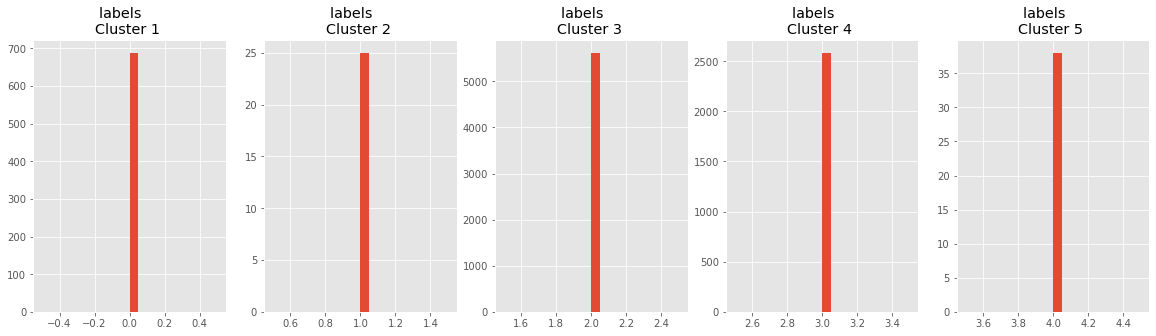

In [39]:
# Plot the histogram of various clusters
for i in credit.columns:
  plt.figure(figsize = (20, 5))
  for j in range(5):
    plt.subplot(1,5,j+1)
    cluster = credit[credit['labels'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,(j+1)))
  
  plt.show()

- Cluster 1: This cluster has highset balance and pay large amount of Cash in Advance. This cluster has highest Limit usage.

- Cluster 2: This cluster has highest monthly purchases and does not choose "None" as purchase type. This cluster makes higher payment than other clusters. However their purchase frequency is low and enjoy high credit limit.

- Cluster 3: This cluster has least balance and makes least purchases although they have moderate purchase frequency. Also they have low credit limit.

- Cluster 4: This cluster is also low in their balance and like to spend moderately. Some of them also prefer to make advance payments. their purchase frequency is average. this cluster has secnod largest credit limit.

- Cluster 5: This cluster has moderete balance. they make low amount of frequent purchases. these have second least credit limit and more likely to make minimum payments and avoid full payment. this cluster prefer installment payment more





## Strategy: Cluster 1 is our best customer. They spend high amount and they spend it frequently. Cluster 1 customer should be given some perks to make sure they make more purchase with our credit card. Cluster 2 has the potential but these customer are not frequently using our credit cards. This cluster should be given certain encouragement though coupon or using marketing to use our credit cards more often. Cluster 3 should be monitered properly and their credit limit shoud be set as required.